# data

## **generating** data

https://deepmimo.net/versions/v2-python/

In [ ]:
!pip install DeepMIMO

link to scenario 1 4
https://drive.google.com/drive/folders/1rAwqd4lr8fvDmpd9wdT7d-hfKuyJWL2l

link to scenario 1 5 
https://drive.google.com/drive/folders/1_Rkcqf-7MckxhswTyx2YDb-q0XjpgwjR
and then mount them in google drive
just creat shortcut to your google drive



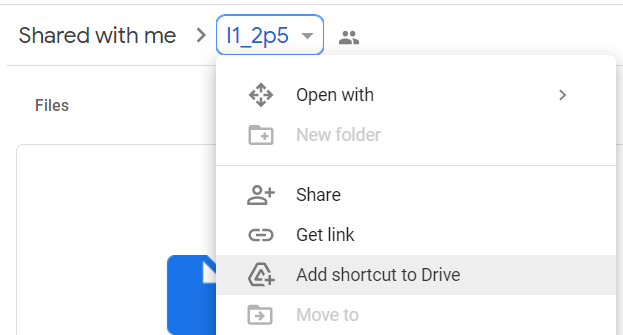



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!unzip /content/gdrive/MyDrive/DeepMIMO2/I1_2p5.zip -d /content/gdrive/MyDrive/DeepMIMO2 
#!unzip /content/gdrive/MyDrive/DeepMIMO2/I1_2p4.zip -d /content/gdrive/MyDrive/DeepMIMO2 

In [ ]:
import DeepMIMO
import numpy as np 

https://github.com/malrabeiah/DL-Massive-MIMO/blob/master/ChannelMapping/main.m

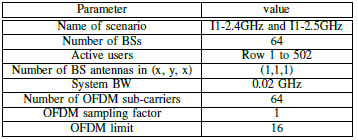

## generating data for scenario `'I1_2p4' `

uplink



---



### setting parameters

In [ ]:
# Load the default parameters
parameters = DeepMIMO.default_params()
# Set scenario name
parameters['scenario'] = 'I1_2p4'
# Set the main folder containing extracted scenarios
parameters['dataset_folder'] = r'/content/gdrive/MyDrive/DeepMIMO2'
# To activate the basestations from 1 tiil 64, set
# each antena has 8 RX 
parameters['active_BS'] = np.arange(1,64 + 1)
# To activate the user rows 1-5 
# according to practical examination i2_2p4 has 201 in each column 
parameters['user_row_first'] = 1
parameters['user_row_last'] = 3


# Number of BS antennas in (x, y, z)
parameters['bs_antenna']['shape'] = np.array([1, 1, 1])
# To generate channels at 0.02 GHz  bandwidth, set
parameters['OFDM']['bandwidth'] = 0.05
# To generate OFDM channels with 64 subcarriers, set
parameters['OFDM']['subcarriers'] = 64
# To sample first 16 subcarriers by every spacing between each, set
parameters['OFDM']['subcarriers_sampling'] = 1
#according to the picture in the article we chioced 32 instead of 16, that was mentioned in TABLE 1
parameters['OFDM']['subcarriers_limit'] = 32
# To only include 1 strongest paths in the channel computation, set
parameters['num_paths'] = 1

#Note: Since this scenario consists 
#of only one access point, please set “enable_BS2BSchannels”
#(MATLAB) or “enable_BS2BS” (Python) to zero in the DeepMIMO 
#generation parameters. 
parameters['enable_BS2BS'] = 0

# Generate data
dataset_uplink = DeepMIMO.generate_data(parameters)


Basestation 1

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8811.47it/s]



Basestation 2

UE-BS Channels


KeyboardInterrupt: ignored

### draw necessary information from dataset 



 Output Variables of Basestation i – User j

`dataset[i]['user']['channel'][j]`

Type and Dimensions: Float matrix of size (number of RX antennas) x (number of TX antennas) x (number of OFDM subcarriers)

Description: The channel matrix between basestation i and user j. Each of the first two dimensions follows a certain reshaping sequence that can be obtained using the following function: 

In [ ]:
dataset_uplink[1]['user']["channel"][:][:,:,:].shape

(603, 8, 1, 32)

In [ ]:
#just using one RX antenna data and one TX antenna form all antennas information  
dataset_up = [dataset_uplink[i]['user']["channel"][:][:,0,0] for i in range(len(dataset_uplink))]
dataset_up = np.array(dataset_up)
#changing the data into form of : [num_user,num_antena,num_subchannel]  
dataset_up = np.transpose(dataset_up,axes=(1,0,2))
print(dataset_up.shape)

(603, 64, 32)


delete unnecessary information to free up RAM memory

In [ ]:
dataset_keys = list(dataset_uplink[0].keys())
dataset_user_keys = list(dataset_uplink[0]['user'].keys())
for i in range(len(dataset_uplink)):
    for del_key in [key for key in dataset_keys if key is not 'user']:
        del dataset_uplink[i][del_key]
    for del_key in [key for key in dataset_user_keys if key is not 'channel']:
        del dataset_uplink[i]['user'][del_key]


## generating data for scenario `'I1_2p5'` 
downlink



---



### setting parameters

In [ ]:
# Load the default parameters
parameters = DeepMIMO.default_params()
# Set scenario name
parameters['scenario'] = 'I1_2p5'
# Set the main folder containing extracted scenarios
parameters['dataset_folder'] = r'/content/gdrive/MyDrive/DeepMIMO2'
# To activate the basestations from 1 tiil 64, set
# each antena has 8 RX 
parameters['active_BS'] = np.arange(1,64 + 1)
# To activate the user rows 1-5 
# according to practical examination i2_2p4 has 201 in each column 
parameters['user_row_first'] = 1
parameters['user_row_last'] = 3


# Number of BS antennas in (x, y, z)
parameters['bs_antenna']['shape'] = np.array([1, 1, 1])
# To generate channels at 0.02 GHz  bandwidth, set
parameters['OFDM']['bandwidth'] = 0.05
# To generate OFDM channels with 64 subcarriers, set
parameters['OFDM']['subcarriers'] = 64
# To sample first 16 subcarriers by every spacing between each, set
parameters['OFDM']['subcarriers_sampling'] = 1
#according to the picture in the article we chioced 32 instead of 16, that was mentioned in TABLE 1
parameters['OFDM']['subcarriers_limit'] = 32
# To only include 1 strongest paths in the channel computation, set
parameters['num_paths'] = 1

#Note: Since this scenario consists 
#of only one access point, please set “enable_BS2BSchannels”
#(MATLAB) or “enable_BS2BS” (Python) to zero in the DeepMIMO 
#generation parameters. 
parameters['enable_BS2BS'] = 0

# Generate data
dataset_downlink = DeepMIMO.generate_data(parameters)


Basestation 1

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9247.64it/s]



Basestation 2

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 7954.88it/s]



Basestation 3

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9083.99it/s]



Basestation 4

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9072.43it/s]



Basestation 5

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9250.28it/s]



Basestation 6

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 7926.85it/s]



Basestation 7

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 7874.31it/s]



Basestation 8

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9335.50it/s]



Basestation 9

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8946.46it/s]



Basestation 10

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 7887.25it/s]



Basestation 11

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8754.04it/s]



Basestation 12

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8218.49it/s]



Basestation 13

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8606.17it/s]



Basestation 14

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8256.10it/s]



Basestation 15

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 7890.65it/s]



Basestation 16

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9074.57it/s]



Basestation 17

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9308.81it/s]



Basestation 18

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 7350.11it/s]



Basestation 19

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9229.32it/s]



Basestation 20

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8587.68it/s]



Basestation 21

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9169.06it/s]



Basestation 22

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8555.11it/s]



Basestation 23

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9070.99it/s]



Basestation 24

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9232.79it/s]



Basestation 25

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8740.04it/s]



Basestation 26

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8660.37it/s]



Basestation 27

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8997.83it/s]



Basestation 28

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9753.48it/s]



Basestation 29

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8959.05it/s]



Basestation 30

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8772.75it/s]



Basestation 31

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8122.62it/s]



Basestation 32

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8263.22it/s]



Basestation 33

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9147.04it/s]



Basestation 34

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8215.34it/s]



Basestation 35

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8927.20it/s]



Basestation 36

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8398.13it/s]



Basestation 37

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8744.36it/s]



Basestation 38

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8888.42it/s]



Basestation 39

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8999.50it/s]



Basestation 40

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 6067.11it/s]



Basestation 41

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8753.10it/s]



Basestation 42

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8590.13it/s]



Basestation 43

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 6867.94it/s]



Basestation 44

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8740.13it/s]



Basestation 45

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8553.12it/s]



Basestation 46

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 7549.93it/s]



Basestation 47

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 7927.23it/s]



Basestation 48

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8614.82it/s]



Basestation 49

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9083.76it/s]



Basestation 50

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 6988.77it/s]



Basestation 51

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9106.76it/s]



Basestation 52

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9594.13it/s]



Basestation 53

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8320.17it/s]



Basestation 54

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9193.76it/s]



Basestation 55

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9052.62it/s]



Basestation 56

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8794.19it/s]



Basestation 57

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8747.35it/s]



Basestation 58

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9327.24it/s]



Basestation 59

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 7614.71it/s]



Basestation 60

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9126.24it/s]



Basestation 61

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9256.34it/s]



Basestation 62

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 8176.74it/s]



Basestation 63

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 7782.50it/s]



Basestation 64

UE-BS Channels


Generating channels: 100%|██████████| 603/603 [00:00<00:00, 9060.24it/s]


### draw necessary information from dataset



Output Variables of Basestation i – User j

`dataset[i]['user']['channel'][j]`

Type and Dimensions: Float matrix of size (number of RX antennas) x (number of TX antennas) x (number of OFDM subcarriers)

Description: The channel matrix between basestation i and user j. Each of the first two dimensions follows a certain reshaping sequence that can be obtained using the following function: 

In [ ]:
dataset_downlink[1]['user']["channel"][:][:,:,:].shape

(603, 8, 1, 32)

In [ ]:
#just using one RX antenna data and one TX antenna form all antennas information  
dataset_down = [dataset_downlink[i]['user']["channel"][:][:,0,0] for i in range(len(dataset_uplink))]
dataset_down = np.array(dataset_down)
#changing the data into form of : [num_user,num_antena,num_subchannel]  
dataset_down = np.transpose(dataset_down,axes=(1,0,2))
dataset_down.shape

(603, 64, 32)

delete unnecessary information to free up RAM memory

In [ ]:
dataset_keys = list(dataset_downlink[0].keys())
dataset_user_keys = list(dataset_downlink[0]['user'].keys())
for i in range(len(dataset_downlink)):
    for del_key in [key for key in dataset_keys if key is not 'user']:
        del dataset_downlink[i][del_key]
    for del_key in [key for key in dataset_user_keys if key is not 'channel']:
        del dataset_downlink[i]['user'][del_key]


## data preprocessing

## make complex form into array form

In [ ]:
def complex_to_array(dataset):
    shape = dataset.shape
    temp = dataset.reshape([*shape,1])
    real_num , imag_num = np.real(temp) , np.imag(temp)
    array_form_of_complex = np.concatenate((real_num,imag_num),axis=len(shape))
    return array_form_of_complex

In [ ]:
data_up = complex_to_array(dataset_up)
data_down = complex_to_array(dataset_down)

## normalized

In [ ]:
def mean_removal(data):
    for i in range(len(data.shape)-2):
        if i == 0 : mean = np.mean(data_up,axis=0)
        mean = np.mean(mean,axis=0)
    return data - mean    

In [ ]:
def normalize(data):
    max = np.max(np.abs(data))
    return data / max

In [ ]:
# Normalizing the absolute of the raw data
norm_data_up = normalize(mean_removal(data_up))
norm_data_down = normalize(mean_removal(data_down))

## mask

In [ ]:
def make_mask (dataset , inp_mask = None , num_set_antenna_M = 8):
    num_ant ,num_subchannel = dataset.shape[0:2];
    mask = np.zeros(dataset.shape);

    if inp_mask == None : 
        antena_selected_mask = np.random.choice(num_ant,
                                                num_set_antenna_M,
                                                replace=False)
        
    else: antena_selected_mask = np.where( mask == 1)
    mask[ antena_selected_mask] =  1
    return mask
#print("number of selected antena : {}".format(antena_selected_mask[0].shape))

## plot

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
def plot_imshow(*atr):
    fig = make_subplots(rows=len(atr), cols=2)
    for j in range(len(atr)):
        for i in range(2):
            fig.add_trace(px.imshow(atr[j][:,:,i]).data[0], row=j+1,col=i+1)
    fig.show()

### checkplot

In [ ]:
mask = make_mask(data_up[0,:,:,:])
plot_imshow(mask)    

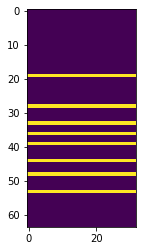

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(mask[:,:,1])

In [ ]:
a = np.array([a for a in data_up[:2]])

In [ ]:
a.shape

(2, 64, 32, 2)

In [ ]:
X = np.array([u*make_mask(u) for u in data_up[:]])

In [ ]:
plot_imshow(X[0,:,:,:],X[2,:,:,:])

## shuffle

In [ ]:
from sklearn.model_selection import train_test_split
X = np.array([u*make_mask(u) for u in norm_data_up[:]])
y = norm_data_down

X = X.astype('float64')
y = y.astype('float64')
X_train, X_test, y_train, y_test = train_test_split(
                                        X, y, test_size=0.33, random_state=42)

# Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , Input , Sequential 
from tensorflow.keras.layers import Flatten , Dense , Reshape 

## define Network

### model

In [ ]:
def MLP (input_shape,output_shape,
         num_layers = [2**10,2**12,2**12,64*32*2] , 
         k_r = None):
    
    model = keras.Sequential()
    model.add(Input(shape=(input_shape)))
    model.add(Flatten())
    for num in num_layers[:-1]:
        model.add(Dense(num, activation="relu" , kernel_regularizer = k_r))

    model.add(Dense(num_layers[-1], activation=None , kernel_regularizer = k_r))    
    model.add(Reshape(output_shape, input_shape=(num_layers[-1],)))    
    return model 

In [ ]:
def MlP_with_dropouts(input_shape,output_shape,
                      num_layers = [2**10,2**12,2**12,64*32*2],
                      dropout_rate=.1 ,
                      k_r = None):
    
    model = keras.Sequential()
    model.add(Input(shape=(input_shape)))
    model.add(Flatten())
    for num in num_layers[:-1]:
        model.add(Dense(num, activation="relu" , kernel_regularizer = k_r))
        model.add(layers.Dropout(dropout_rate))

    model.add(Dense(num_layers[-1], activation=None , kernel_regularizer = k_r))    
    model.add(Reshape(output_shape, input_shape=(num_layers[-1],)))    
    return model 

In [ ]:
import keras.backend as K

### Loss

In [ ]:
def NMSE_loss (y_true , y_pred):
    return tf.cast(K.mean(K.square(y_pred - y_true)/ (2*K.square(y_true))),tf.float64)

In [ ]:
def MSE_loss (y_true , y_pred):
    return K.mean(K.square(y_pred-y_true))

### train

In [ ]:
# The network is regularized using L2-norm with weight decay of 0.0001.
# although the article defines NMSE, MSE is way better than NMSE 
l2_reg = tf.keras.regularizers.l2(l2= 10**-4)
# creating the model
model = MLP(X_train[0].shape,y_train[0].shape, k_r =l2_reg)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss= NMSE_loss,
    metrics=["accuracy"],
)  
model.fit(X_train,y_train, epochs=17, batch_size=100,validation_freq=50 , verbose=2 )